In [42]:

import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import root

In [89]:
"""
%% Summary of CJK_Func.m %%
The function generates the value of CJK representation. 
Note that, this function is not used directly, it is used to solve for Bt
--------------------------------------------------------------------------
Input:
    Bt - the value of boundary at t
    Bs - the value of boundary at s
    k - strike price
    r - risk-free interest rate
    q - continuously compounded dividend rate
    vol - annualized volatility
    T - maturity
    t - current time
--------------------------------------------------------------------------
Output:
   y - value of CJK reprentation
--------------------------------------------------------------------------
Author:
    Nattapong Kongmuang
    nat.kmg@gmail.com
    MSc Financial Engineering, ICMA Centre, Henley Business School, 
    University of Reading, UK
    24 July 2015
--------------------------------------------------------------------------
"""

def d1(x,y,z,b,vol):
   return (np.log(x/y)+(b+0.5*vol**2)*z)/(vol*np.sqrt(z)) 

def d2(x,y,z,b,vol):
    return d1(x,y,z,b,vol)-vol*np.sqrt(z) 

def CJK_Func( Bt,Bs,k,r,q,vol,T,t ):
    
    T1 = T-t
    b=r-q
    term = np.zeros(5)
    term[0] = Bt
    term[1] = -k
    term[2] = k*np.exp(-r*T1)*norm.cdf(-d2(Bt,k,T1,b,vol))
    term[3] = -Bt*np.exp(-q*T1)*norm.cdf(-d1(Bt,k,T1,b,vol))
    integralFun = lambda s: r*k*np.exp(-r*(s))*norm.cdf(-d2(Bt,Bs,(s),b,vol)) - q*Bt*np.exp(-q*(s))*norm.cdf(-d1(Bt,Bs,(s),b,vol))
    term[4] = quad(integralFun,t,T)[0]
    y = np.sum(term)
    return y


In [90]:
"""
%% Summary of Boundary.m %%
The function generates the early exercise boundary and spot of time by 
CJK representation
--------------------------------------------------------------------------
Input:
    k - strike price
    r - risk-free interest rate
    q - continuously compounded dividend rate
    vol - annualized volatility
    T - time to maturity
    steps - a number of time steps in the calculation
--------------------------------------------------------------------------
Output:
    B - the values of early exercise boundary 
    time - the point of time that each B-value is calculated
--------------------------------------------------------------------------
Author:
    Nattapong Kongmuang
    nat.kmg@gmail.com
    MSc Financial Engineering, ICMA Centre, Henley Business School, 
    University of Reading, UK
    24 July 2015
--------------------------------------------------------------------------
"""
def Boundary( k,r,q,vol,T,steps ):
    dt=T/steps
    t=T
    B = np.zeros(steps+1)
    time = np.linspace(0,T,np.floor(dt).astype(np.int))
    for i  in range(steps,1,-1):
        if i==steps:
            if q == 0:
                B[i]=np.min(k,k*r/q)
            else:
                B[i]=k
        else:
            t=t-dt
            res=root(lambda Bt: CJK_Func(Bt,B[i+1],k,r,q,vol,T,t) ,k)
            B[i] = res.x
            
    return B

In [93]:
s0 = 100
k = 100
r = 0.07
q = 0.03
vol = 0.25
T=1
paths = 100000
steps = 100
dt=T/steps
   
B = Boundary( k,r,q,vol,T,steps) 

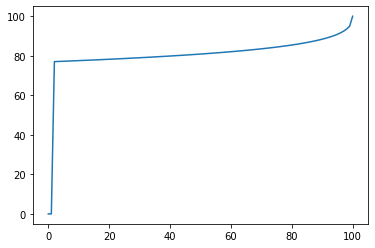

In [94]:
from matplotlib import pyplot as plt
plt.plot(B)